<a href="https://colab.research.google.com/github/Tar-ive/Data-Analysis-Projects-/blob/main/amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [7]:
df = pd.read_csv('amazon.csv' , encoding = 'iso-8859-1' , parse_dates=['date'])


In [8]:
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [9]:
df['date'].dtypes

dtype('<M8[ns]')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [11]:
df.describe(include='all')

<ipython-input-11-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01 00:00:00
freq,NaN,717,541,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN


In [12]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [13]:
df.shape

(6454, 5)

In [14]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [15]:
df.duplicated().sum()

32

In [16]:
df = df.drop_duplicates()


In [17]:
df.shape

(6422, 5)

In [18]:
df.duplicated().sum()

0

In [19]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,number
year,1.0000,0.0626
number,0.0626,1.0000


<ipython-input-20-6812646cd074>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

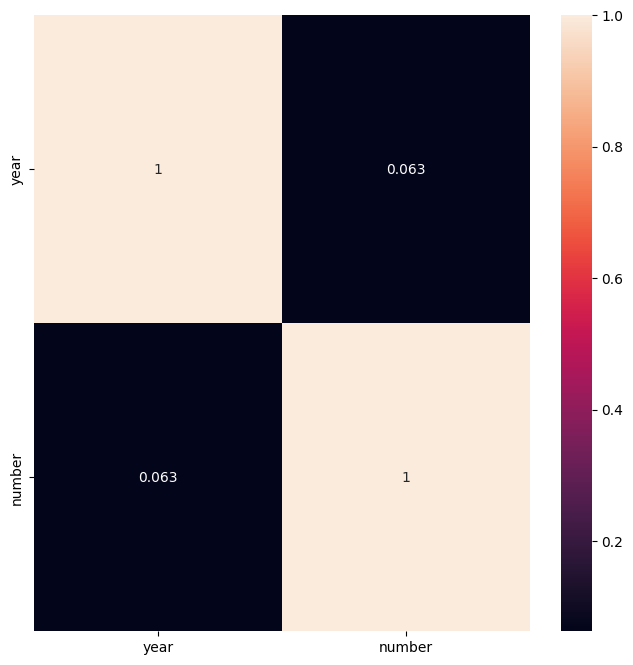

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [21]:
df['month'].value_counts()

Agosto       540
Setembro     540
Outubro      540
Novembro     540
Junho        539
Julho        539
Janeiro      535
Fevereiro    535
Março        534
Abril        534
Maio         533
Dezembro     513
Name: month, dtype: int64

In [22]:
df['month_new'] = df['month'].map({ 'Fevereiro': 'February' , 'Março': 'March ' , 'Agosto': 'August ' , 'Junho':'June' , 'Julho': 'July' , 'Abril': 'April' , 'Maio' : 'May' , 'Dezembro': 'December' , 'Setembro ': 'September' , 'Novembro' : 'November ', 'Outubro': 'October' , 'Janeiro': 'January' })

<ipython-input-22-91bb2fe69e34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_new'] = df['month'].map({ 'Fevereiro': 'February' , 'Março': 'March ' , 'Agosto': 'August ' , 'Junho':'June' , 'Julho': 'July' , 'Abril': 'April' , 'Maio' : 'May' , 'Dezembro': 'December' , 'Setembro ': 'September' , 'Novembro' : 'November ', 'Outubro': 'October' , 'Janeiro': 'January' })


In [23]:
df['month_new'].value_counts()

August       540
October      540
November     540
June         539
July         539
January      535
February     535
March        534
April        534
May          533
December     513
Name: month_new, dtype: int64

In [24]:
df = df.drop('month' , axis=1 )

In [25]:
df

,year,state,number,date,month_new
0,1998,Acre,0.0,1998-01-01,January
1,1999,Acre,0.0,1999-01-01,January
2,2000,Acre,0.0,2000-01-01,January
3,2001,Acre,0.0,2001-01-01,January
4,2002,Acre,0.0,2002-01-01,January
...,...,...,...,...,...
6449,2012,Tocantins,128.0,2012-01-01,December
6450,2013,Tocantins,85.0,2013-01-01,December
6451,2014,Tocantins,223.0,2014-01-01,December
6452,2015,Tocantins,373.0,2015-01-01,December


In [26]:
x= df.groupby('month_new')['number'].sum().reset_index()

In [27]:
x 

,month_new,number
0,April,28184.770
1,August,88050.435
2,December,57535.480
3,February,30839.050
4,January,47681.844
5,July,92319.113
6,June,55997.675
7,March,30709.405
8,May,34725.363
9,November,85508.054


In [28]:
x[x['month_new']=='July']

,month_new,number
5,July,92319.113


In [29]:
x.mean()

<ipython-input-29-6f9184126d05>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.mean()


number    58202.978909
dtype: float64

In [30]:
x.describe()

,number
count,11.000000
mean,58202.978909
std,26081.160166
min,28184.770000
25%,32782.206500
50%,55997.675000
75%,86779.244500
max,92319.113000


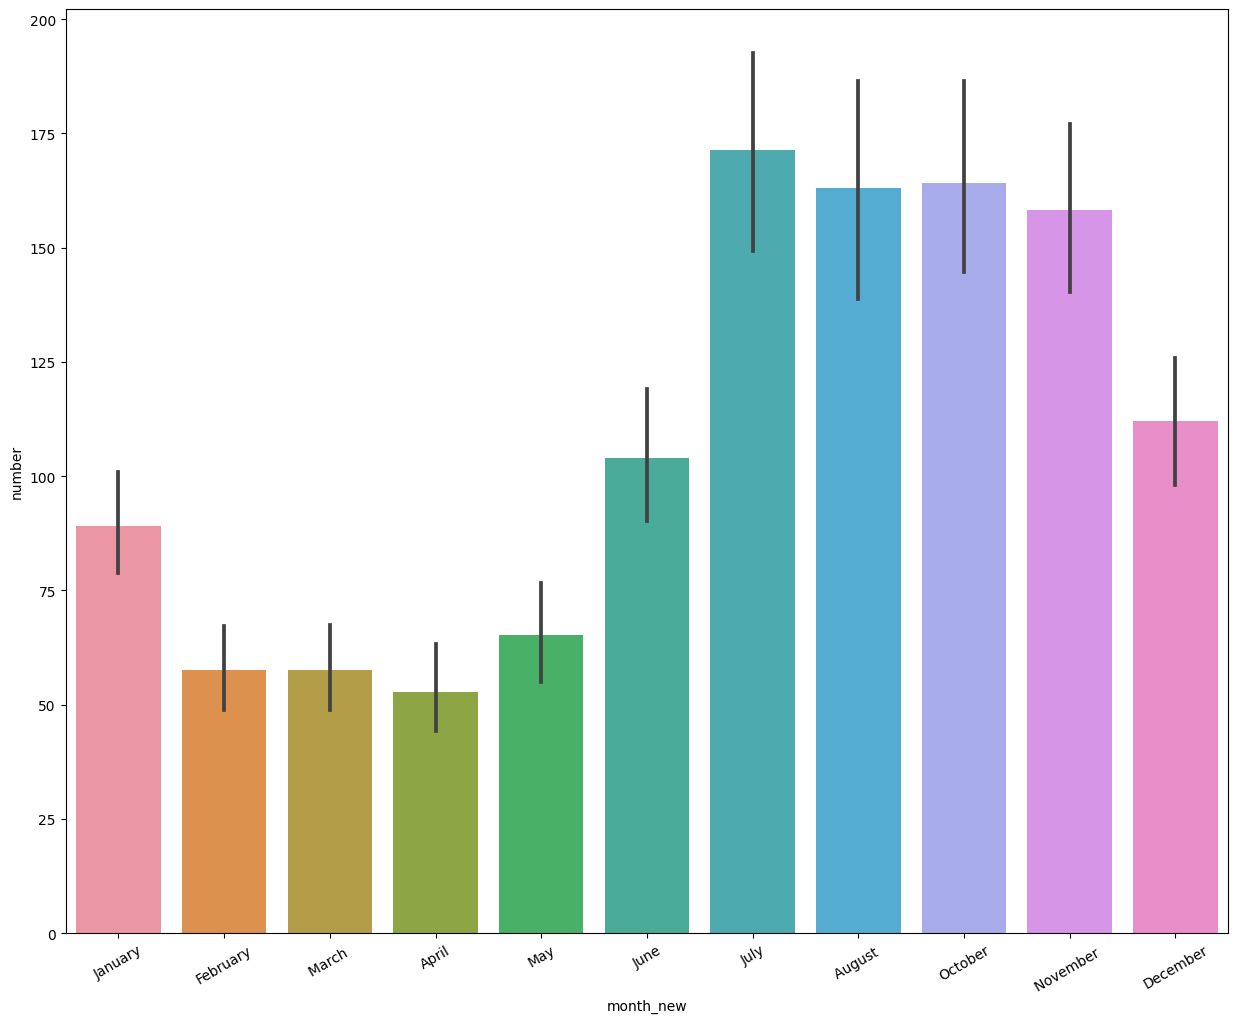

In [31]:
plt.figure(figsize=(15,12))

sns.barplot(data=df, x="month_new", y="number")
plt.xticks(rotation=30 )
plt.show()

In [32]:
c= df.groupby('year')['number'].sum().reset_index()

In [33]:
c.max()

year       2017.000
number    42760.674
dtype: float64

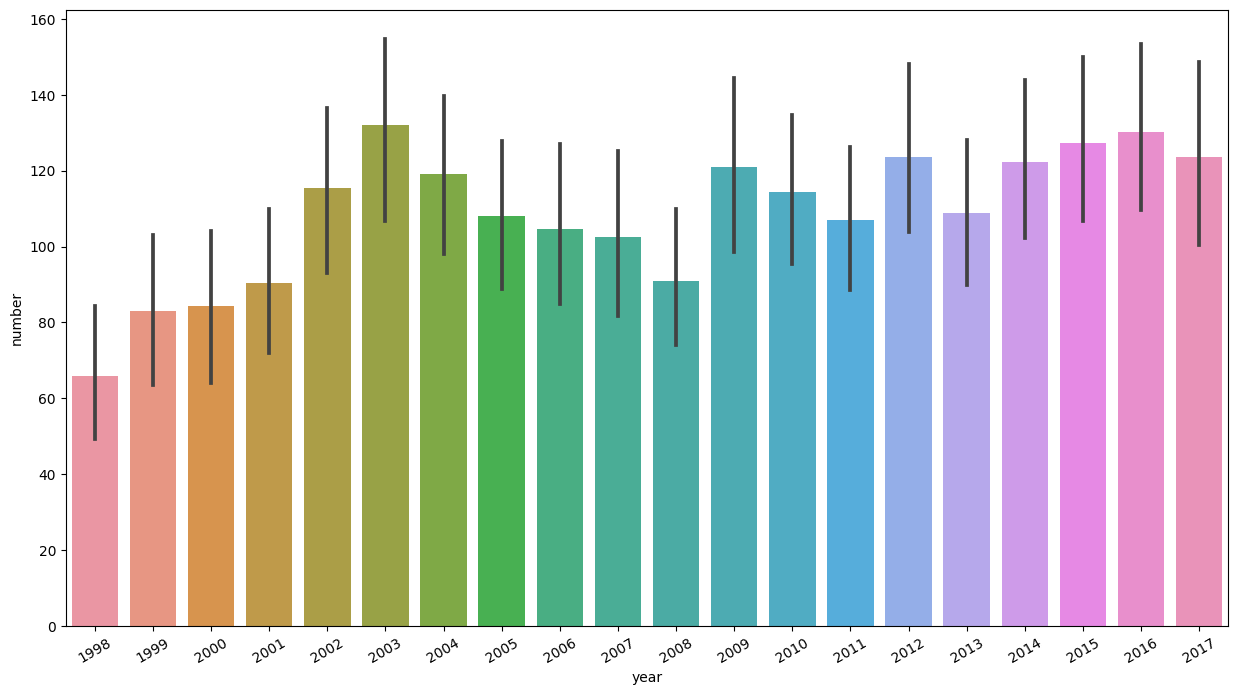

In [34]:
plt.figure(figsize=(15,8))

sns.barplot(data=df, x="year", y="number")
plt.xticks(rotation=30 )
plt.show()

In which state maximum number of forest fires were reported ? 

In [35]:
v = df.groupby('state')["number"].sum().reset_index()

In [36]:
v

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


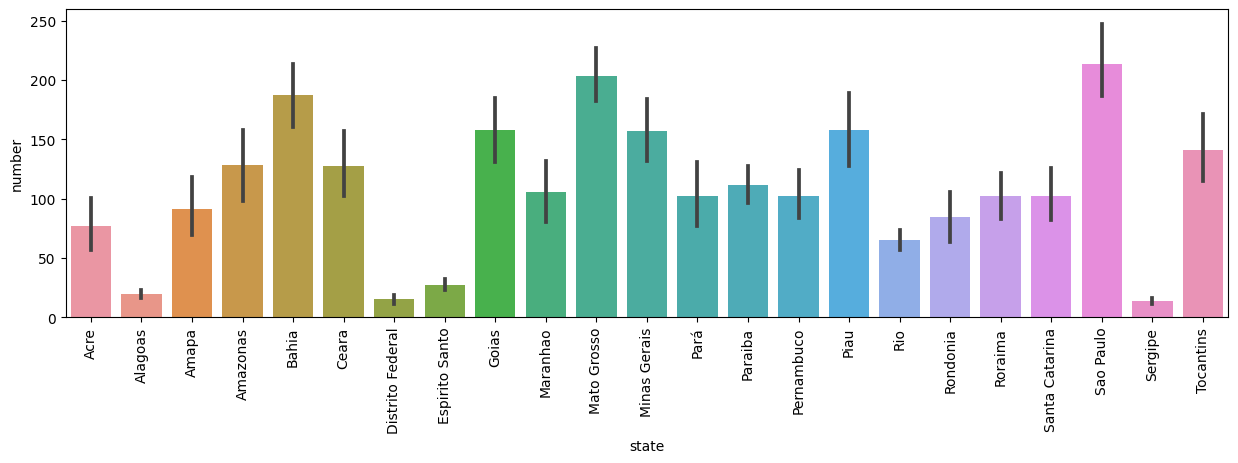

In [37]:
plt.figure(figsize=(15,4))

sns.barplot(data=df, x="state", y="number")
plt.xticks(rotation=90 )
plt.show()

In [38]:
df.columns

Index(['year', 'state', 'number', 'date', 'month_new'], dtype='object')

In [39]:
total_fires_amazonas = df[df['state'] == 'Amazonas']['number'].sum()
print("Total number of fires reported in Amazonas:", total_fires_amazonas)

Total number of fires reported in Amazonas: 30650.129


In [40]:
fy = df[df['state'] == 'Amazonas'].groupby('year')['number'].sum()
print("Number of fires reported in Amazonas (year-wise):\n", fy)

Number of fires reported in Amazonas (year-wise):
 year
1998     946.000
1999    1061.000
2000     853.000
2001    1297.000
2002    2852.000
2003    1524.268
2004    2298.207
2005    1657.128
2006     997.640
2007     589.601
2008    2717.000
2009    1320.601
2010    2324.508
2011    1652.538
2012    1110.641
2013     905.217
2014    2385.909
2015    1189.994
2016    2060.972
2017     906.905
Name: number, dtype: float64


In [41]:
fd = df[df['state'] == 'Amazonas'].groupby('date')['number'].sum()
print("Number of fires reported in Amazonas (day-wise):\n", fd)

Number of fires reported in Amazonas (day-wise):
 date
1998-01-01     946.000
1999-01-01    1061.000
2000-01-01     853.000
2001-01-01    1297.000
2002-01-01    2852.000
2003-01-01    1524.268
2004-01-01    2298.207
2005-01-01    1657.128
2006-01-01     997.640
2007-01-01     589.601
2008-01-01    2717.000
2009-01-01    1320.601
2010-01-01    2324.508
2011-01-01    1652.538
2012-01-01    1110.641
2013-01-01     905.217
2014-01-01    2385.909
2015-01-01    1189.994
2016-01-01    2060.972
2017-01-01     906.905
Name: number, dtype: float64
